In [4]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

In [5]:
#Cargamos el archivo
data= pd.read_csv('CountryTable.csv') 
data

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


*****************************LIMPIEZA VALORES NULOS*********************************

In [6]:
#Se identidican los valores nulos de nuestro dataframe
data_Nulos= data.isnull().sum()
data_Nulos

code                  0
name                  0
continent             0
region                0
surface_area          0
independence_year    47
population            0
life_expectancy      17
gnp                   0
gnp_old              61
local_name            1
government_form       0
head_of_state         3
capital               7
code2                 1
dtype: int64

In [7]:
#Una vez identificados los valores nulos de cada columna se reemplazan
#de la siguiente manera

#“independence_year”: Rellenar con el valor “1900”
data["independence_year"] =data["independence_year"].fillna(1900) 
data

#“life_expectancy”: Rellenar con el valor “Media” de la columna
mean_lifeexpectancy=data['life_expectancy'].mean() 
data['life_expectancy'].fillna(value=mean_lifeexpectancy, inplace=True) 

#“gnp_old ”: Rellenar con el valor “Mediana” de la columna
mean_gnpold=data['gnp_old'].median() 
data['gnp_old'].fillna(value=mean_gnpold, inplace=True) 

#“local_name”: Rellenar con el string “Inexistente”
data["local_name"] =data["local_name"].fillna("Inexistente") 
data

#“head_of_state”: Rellenar con el string “Desconocido”
data["head_of_state"] =data["head_of_state"].fillna("Desconocido") 
data

#“capital ”: Rellenar con el valor “0”
data["capital"] =data["capital"].fillna(0) 
data

#“code2”: Rellenar con el string “NA”
data["code2"] =data["code2"].fillna("NA") 
data


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900.0,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,8421.0,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900.0,8000,76.1,63.2,8421.0,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,8421.0,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [11]:
#Verificamos que ya no tengamos valores nulos
data_Nulos= data.isnull().sum().sum()
data_Nulos

0

*****************************OUTLIERS*********************************

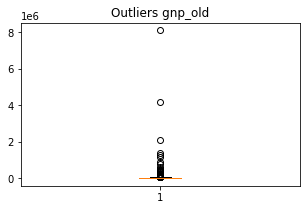

In [20]:
#Aplicar método de distribución normal para identificar Outliers,
#tomando como limites 2 desviaciones estándar, exclusivamente para las columnas “gnp old” y “population”, 
#obtener los diagramas de caja de cada una respectivamente.

#Visualizamos los datos de la variable gnp_old
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["gnp_old"]) 
plt.title("Outliers gnp_old")
plt.show() #dibujamos el diagrama

In [21]:
y=data["gnp_old"]
Limite_Superior= y.mean() + 2*y.std()
Limite_Inferior= y.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_gnp_old= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_gnp_old

Limite superior permitido 1375629.5313349972
Limite inferior permitido -1124761.0041383444


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
56,DEu,Germany,Europe,Western Europe,357022.0,1955.0,82164700,77.4,2133367.0,2102826.0,Deutschland,Federal Republic,Johannes Rau,3068.0,DE
72,FRA,France,Europe,Western Europe,551500.0,843.0,59225700,78.8,1424285.0,1392448.0,France,Republic,Jacques Chirac,2974.0,FR
109,JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP
223,uSA,united States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,united States,Federal Republic,George W. Bush,3813.0,uS


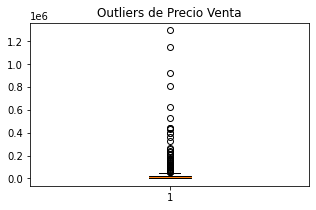

In [22]:
gnp_old_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(gnp_old_clean["gnp_old"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

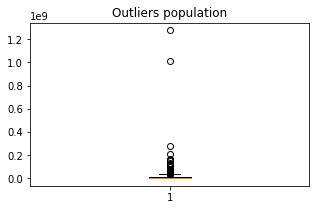

In [23]:
#Visualizamos los datos de la variable population
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["population"]) 
plt.title("Outliers population")
plt.show() #dibujamos el diagrama

In [24]:
y2=data["population"]
Limite_Superior2= y2.mean() + 2*y.std()
Limite_Inferior2= y2.mean() - 2*y.std()
print("Limite superior permitido", Limite_Superior2)
print("Limite inferior permitido", Limite_Inferior2)

#Encontramos Ouliers
outliers_population= data[(y2>Limite_Superior2)|(y2<Limite_Inferior2)]
outliers_population

Limite superior permitido 26684293.38489148
Limite inferior permitido 24183902.84941814


,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
0,ABW,Aruba,North America,Caribbean,193.0,1900.0,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,8421.0,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,Jose Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,1900.0,8000,76.1,63.2,8421.0,Anguilla,Dependent Territory of the uK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqiperia,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YuG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,8421.0,Jugoslavija,Federal Republic,Vojislav KoStunica,1792.0,Yu
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


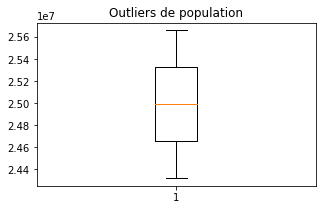

In [25]:
population_clean= data[(y2<=Limite_Superior2)&(y2>=Limite_Inferior2)]

fig = plt.figure(figsize =(5, 3))
plt.boxplot(population_clean["population"]) 
plt.title("Outliers de population")
plt.show() #dibujamos el diagrama